In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.model_selection import train_test_split
import seaborn as sb
from platform import python_version

from sklearn.metrics import mean_squared_error as mse

print(python_version())
print(np.version.version)
print(pd.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)
print(sb.__version__)
time.time()

3.7.15
1.21.6
1.3.5
3.2.2
1.0.2
0.11.2


1669186363.4223814

**Reading the original dataframe provided by NIST for saturated R134a temperature based**

In [3]:
o_df=pd.read_excel('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated.xlsx')
o_df

,T ©,P (kPa),Density-f (kg/m^3),vf (m^3/kg),uf (kJ/kg),hf (kJ/kg),sf (kJ/kg.K),Cv-f (kJ/kg.K),Cp-f (kJ/kg.K),Sound Spd.-f (m/s),...,vg (m^3/kg),ug (kJ/kg),hg (kJ/kg),sg (kJ/kg.K),Cv-g (kJ/kg.K),Cp-g (kJ/kg.K),Sound Spd.-g (m/s),Joule-Thomson-g (K/MPa),Viscosity-g (Pa.s),Therm. Cond.-g (W/m.K)
0,-40.003000,51.2,1417.70,0.000705,148.10,148.14,0.79559,0.83283,1.2546,807.220,...,0.361140,355.51,374.00,1.7643,0.65257,0.74899,143.630,57.087,0.000009,0.008173
1,-36.003000,62.9,1406.10,0.000711,153.13,153.18,0.81698,0.83714,1.2617,788.380,...,0.297740,357.81,376.53,1.7588,0.66266,0.76141,144.300,53.474,0.000009,0.008499
2,-31.989000,76.7,1394.30,0.000717,158.21,158.26,0.83820,0.84154,1.2691,769.560,...,0.247140,360.11,379.07,1.7538,0.67295,0.77430,144.900,50.225,0.000010,0.008828
3,-28.001000,92.7,1382.40,0.000723,163.28,163.34,0.85905,0.84599,1.2767,750.940,...,0.206810,362.40,381.57,1.7492,0.68332,0.78759,145.430,47.314,0.000010,0.009155
4,-25.993000,101.7,1376.40,0.000727,165.84,165.91,0.86947,0.84825,1.2807,741.590,...,0.189520,363.55,382.83,1.7471,0.68861,0.79446,145.670,45.954,0.000010,0.009320
5,-24.001000,111.3,1370.40,0.000730,168.39,168.47,0.87975,0.85051,1.2847,732.330,...,0.174070,364.70,384.07,1.7451,0.69390,0.80142,145.900,44.668,0.000010,0.009485
6,-21.990000,121.7,1364.30,0.000733,170.97,171.06,0.89007,0.85282,1.2889,723.010,...,0.160000,365.85,385.32,1.7432,0.69927,0.80857,146.100,43.431,0.000010,0.009651
7,-20.006000,132.7,1358.30,0.000736,173.53,173.63,0.90022,0.85510,1.2930,713.810,...,0.147430,366.99,386.55,1.7413,0.70462,0.81577,146.280,42.264,0.000010,0.009816
8,-18.000000,144.6,1352.10,0.000740,176.12,176.23,0.91042,0.85743,1.2973,704.530,...,0.135920,368.13,387.79,1.7396,0.71007,0.82320,146.440,41.138,0.000010,0.009983
9,-15.997000,157.3,1345.90,0.000743,178.72,178.84,0.92056,0.85977,1.3017,695.280,...,0.125500,369.28,389.02,1.7379,0.71555,0.83076,146.590,40.062,0.000010,0.010150


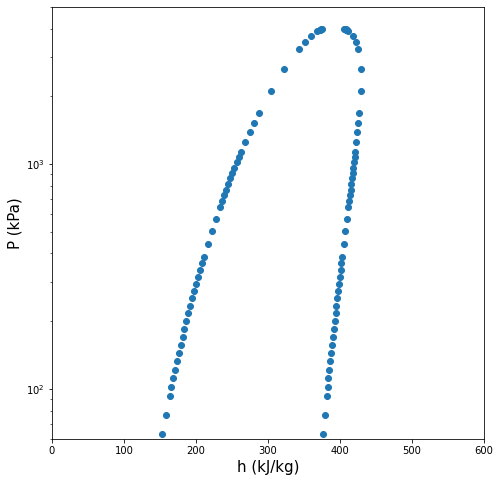

In [4]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1.5]);
ax.set_yscale('log');
plt.ylim([60, 5000]);
plt.xlim([0, 600]);
ax.scatter(x=o_df['hf (kJ/kg)'].values,y=o_df['P (kPa)'].values,c='#1f77b4',marker='o');
ax.scatter(x=o_df['hg (kJ/kg)'].values,y=o_df['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=15);
ax.set_xlabel('h (kJ/kg)',fontsize=15);

#Augmenting the data first for pressure

In [5]:
o_df.columns

Index(['T ©', 'P (kPa)', 'Density-f (kg/m^3)', 'vf (m^3/kg)', 'uf (kJ/kg)',
       'hf (kJ/kg)', 'sf (kJ/kg.K)', 'Cv-f (kJ/kg.K)', 'Cp-f (kJ/kg.K)',
       'Sound Spd.-f (m/s)', 'Joule-Thomson-f (K/MPa)', 'Viscosity-f (Pa.s)',
       'Therm. Cond.-f (W/m.K)', 'Density-g (kg/m^3)', 'vg (m^3/kg)',
       'ug (kJ/kg)', 'hg (kJ/kg)', 'sg (kJ/kg.K)', 'Cv-g (kJ/kg.K)',
       'Cp-g (kJ/kg.K)', 'Sound Spd.-g (m/s)', 'Joule-Thomson-g (K/MPa)',
       'Viscosity-g (Pa.s)', 'Therm. Cond.-g (W/m.K)'],
      dtype='object')

In [6]:
step_P=.2 #kPa
df=o_df #Making a copy of the original dataframe
generated={'T ©':[],
           'P (kPa)':[],
           'vf (m^3/kg)':[],
           'vg (m^3/kg)':[],
           'uf (kJ/kg)':[],
           'ug (kJ/kg)':[],
           'hf (kJ/kg)':[],
           'hg (kJ/kg)':[],
           'sf (kJ/kg.K)':[],
           'sg (kJ/kg.K)':[],
           'Sound Spd.-f (m/s)':[],
           'Sound Spd.-g (m/s)':[],
           'Viscosity-f (Pa.s)':[],
           'Viscosity-g (Pa.s)':[],
           'Therm. Cond.-f (W/m.K)':[],
           'Therm. Cond.-g (W/m.K)':[]} #Will use this dict to append the generated lines 

for i,P1 in enumerate(df['P (kPa)']): #Iterate over the entire data with temp and index
  if P1 == df['P (kPa)'].unique().max(): 
    generated['P (kPa)'].append(P1)
    generated['T ©'].append(float(df[df['P (kPa)']==P1]['T ©']))
    for prop in list(['vf (m^3/kg)', 'uf (kJ/kg)', 'hf (kJ/kg)', 'sf (kJ/kg.K)', 'Sound Spd.-f (m/s)', 
               'Viscosity-f (Pa.s)', 'Therm. Cond.-f (W/m.K)', 'vg (m^3/kg)', 'ug (kJ/kg)', 'hg (kJ/kg)',
               'sg (kJ/kg.K)','Sound Spd.-g (m/s)', 'Viscosity-g (Pa.s)', 'Therm. Cond.-g (W/m.K)']):
      generated[prop].append(float((df[df['P (kPa)']==P1][prop].values)))

    print('Appended for P= {}'.format(P1))

    #To break when getting the end of the data because at which there is no temp 
    #lower than it to interpolate with
    print("Ended")
    break
  else:
    P2=df['P (kPa)'].iloc[i+1] #Selecting the next temp as T2 for interpolation
  
  #Iteration over a new points between two consequant temperature points by the step
  for P in np.linspace(P1,P2,num=int((P2-P1)/step_P)): 
    #The num here represents the number of steps between the start and end points
    #The step is approximatly .1 degree celsius
    
    
    #Printing as indecation for the current temperature
    print("For P {}, between {} and {}.".format(P,P1,P2)) 
    
    #Here making the interpolation for the pressure P in details
    #but for the rest of props it will be done while appending
    T1=df['T ©'].iloc[i]
    T2=df['T ©'].iloc[i+1]
    T=(T1-((P1-P)/(P1-P2)*(T1-T2)))

    generated['T ©'].append(T)
    generated['P (kPa)'].append(P)
    for prop in list(['vf (m^3/kg)', 'uf (kJ/kg)', 'hf (kJ/kg)', 'sf (kJ/kg.K)', 'Sound Spd.-f (m/s)', 
               'Viscosity-f (Pa.s)', 'Therm. Cond.-f (W/m.K)', 'vg (m^3/kg)', 'ug (kJ/kg)', 'hg (kJ/kg)',
               'sg (kJ/kg.K)','Sound Spd.-g (m/s)', 'Viscosity-g (Pa.s)', 'Therm. Cond.-g (W/m.K)']):

      generated[str(prop)].append(df[str(prop)].iloc[i]-((df['P (kPa)'].iloc[i]-P)/(df['P (kPa)'].iloc[i]-df['P (kPa)'].iloc[i+1])*(df[str(prop)].iloc[i]-df[str(prop)].iloc[i+1])))

df_part1=pd.DataFrame(generated)
generated=0
df_part1

Streaming output truncated to the last 5000 lines.
For P 3000.3201702685005, between 2633.2 and 3244.2000000000003.
For P 3000.5202357563853, between 2633.2 and 3244.2000000000003.
For P 3000.7203012442696, between 2633.2 and 3244.2000000000003.
For P 3000.9203667321544, between 2633.2 and 3244.2000000000003.
For P 3001.120432220039, between 2633.2 and 3244.2000000000003.
For P 3001.320497707924, between 2633.2 and 3244.2000000000003.
For P 3001.520563195809, between 2633.2 and 3244.2000000000003.
For P 3001.7206286836936, between 2633.2 and 3244.2000000000003.
For P 3001.9206941715784, between 2633.2 and 3244.2000000000003.
For P 3002.120759659463, between 2633.2 and 3244.2000000000003.
For P 3002.320825147348, between 2633.2 and 3244.2000000000003.
For P 3002.5208906352327, between 2633.2 and 3244.2000000000003.
For P 3002.7209561231175, between 2633.2 and 3244.2000000000003.
For P 3002.9210216110023, between 2633.2 and 3244.2000000000003.
For P 3003.1210870988866, between 2633.2 and

,T ©,P (kPa),vf (m^3/kg),vg (m^3/kg),uf (kJ/kg),ug (kJ/kg),hf (kJ/kg),hg (kJ/kg),sf (kJ/kg.K),sg (kJ/kg.K),Sound Spd.-f (m/s),Sound Spd.-g (m/s),Viscosity-f (Pa.s),Viscosity-g (Pa.s),Therm. Cond.-f (W/m.K),Therm. Cond.-g (W/m.K)
0,-40.003000,51.200000,0.000705,0.361140,148.100000,355.510000,148.140000,374.000000,0.795590,1.764300,807.220000,143.630000,0.000467,0.000009,0.110590,0.008173
1,-39.932825,51.405263,0.000705,0.360028,148.188246,355.550351,148.228421,374.044386,0.795965,1.764204,806.889474,143.641754,0.000467,0.000009,0.110556,0.008179
2,-39.862649,51.610526,0.000706,0.358915,148.276491,355.590702,148.316842,374.088772,0.796341,1.764107,806.558947,143.653509,0.000466,0.000009,0.110522,0.008185
3,-39.792474,51.815789,0.000706,0.357803,148.364737,355.631053,148.405263,374.133158,0.796716,1.764011,806.228421,143.665263,0.000466,0.000009,0.110488,0.008190
4,-39.722298,52.021053,0.000706,0.356691,148.452982,355.671404,148.493684,374.177544,0.797091,1.763914,805.897895,143.677018,0.000465,0.000009,0.110454,0.008196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19719,100.332554,3999.395683,0.001579,0.002565,369.205108,395.171655,375.520360,405.430288,1.524571,1.604738,97.768288,93.130410,0.000046,0.000026,0.062762,0.065863
19720,100.335036,3999.597122,0.001579,0.002564,369.220072,395.157770,375.536906,405.413525,1.524614,1.604692,97.744525,93.124273,0.000046,0.000026,0.062790,0.065915
19721,100.337518,3999.798561,0.001580,0.002563,369.235036,395.143885,375.553453,405.396763,1.524657,1.604646,97.720763,93.118137,0.000046,0.000026,0.062819,0.065966
19722,100.340000,4000.000000,0.001580,0.002563,369.250000,395.130000,375.570000,405.380000,1.524700,1.604600,97.697000,93.112000,0.000046,0.000026,0.062848,0.066017


In [7]:
df_part1=df_part1.drop_duplicates(subset=['T ©','P (kPa)'])

In [8]:
df_part1.describe()

,T ©,P (kPa),vf (m^3/kg),vg (m^3/kg),uf (kJ/kg),ug (kJ/kg),hf (kJ/kg),hg (kJ/kg),sf (kJ/kg.K),sg (kJ/kg.K),Sound Spd.-f (m/s),Sound Spd.-g (m/s),Viscosity-f (Pa.s),Viscosity-g (Pa.s),Therm. Cond.-f (W/m.K),Therm. Cond.-g (W/m.K)
count,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000,19677.000000
mean,60.276799,2029.010101,0.001025,0.021119,290.750476,402.289359,293.045258,419.933843,1.292304,1.690657,328.782262,125.117431,0.000130,0.000015,0.066313,0.022759
std,31.916488,1138.475425,0.000191,0.037021,50.609275,11.493609,52.115824,10.666259,0.158536,0.029103,160.716092,16.059259,0.000072,0.000004,0.013481,0.010183
min,-40.003000,51.200000,0.000705,0.002563,148.100000,355.510000,148.140000,374.000000,0.795590,1.604600,97.697000,93.112000,0.000046,0.000009,0.051600,0.008173
25%,41.003108,1044.500361,0.000875,0.005303,256.995307,398.605019,257.910397,415.876000,1.195217,1.673267,198.688435,111.580065,0.000079,0.000012,0.055046,0.015567
50%,68.008280,2030.160166,0.000993,0.009209,298.923454,406.913786,300.939885,424.099198,1.323560,1.696954,300.288436,126.694867,0.000110,0.000014,0.062572,0.020044
75%,86.240995,3014.524820,0.001150,0.019416,331.726182,410.579234,335.209005,427.539650,1.418175,1.710699,431.692996,139.998773,0.000159,0.000017,0.074286,0.027532
max,100.340000,4000.000000,0.001580,0.361140,369.250000,411.830000,375.570000,428.810000,1.524700,1.764300,807.220000,146.990000,0.000467,0.000026,0.110590,0.066017


In [9]:
'''file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_{}_for_P_part1.csv'.format(step_P)
  
# saving the csv
df_part1.to_csv(file_name,index=False)
print('DataFrame is written to csv File successfully.',file_name)'''

"file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_{}_for_P_part1.csv'.format(step_P)\n  \n# saving the csv\ndf_part1.to_csv(file_name,index=False)\nprint('DataFrame is written to csv File successfully.',file_name)"

In [10]:
'''df_part1=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_0.5_for_P_part1.csv')

df_part1'''

"df_part1=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_0.5_for_P_part1.csv')\n\ndf_part1"

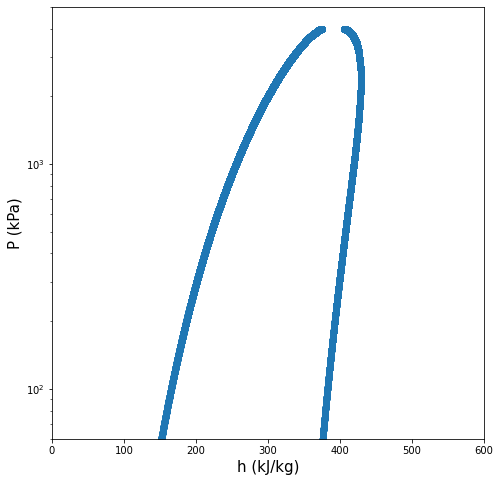

In [11]:
fig=plt.figure();
ax=fig.add_axes([0,0,1,1.5]);
ax.set_yscale('log');
plt.ylim([60, 5000]);
plt.xlim([0, 600]);
ax.scatter(x=df_part1['hf (kJ/kg)'].values,y=df_part1['P (kPa)'].values,c='#1f77b4',marker='o');
ax.scatter(x=df_part1['hg (kJ/kg)'].values,y=df_part1['P (kPa)'].values,c='#1f77b4',marker='o');
ax.set_ylabel('P (kPa)',fontsize=15);
ax.set_xlabel('h (kJ/kg)',fontsize=15);

#Augmenting the data second with various qualities


In [12]:
df.columns

Index(['T ©', 'P (kPa)', 'Density-f (kg/m^3)', 'vf (m^3/kg)', 'uf (kJ/kg)',
       'hf (kJ/kg)', 'sf (kJ/kg.K)', 'Cv-f (kJ/kg.K)', 'Cp-f (kJ/kg.K)',
       'Sound Spd.-f (m/s)', 'Joule-Thomson-f (K/MPa)', 'Viscosity-f (Pa.s)',
       'Therm. Cond.-f (W/m.K)', 'Density-g (kg/m^3)', 'vg (m^3/kg)',
       'ug (kJ/kg)', 'hg (kJ/kg)', 'sg (kJ/kg.K)', 'Cv-g (kJ/kg.K)',
       'Cp-g (kJ/kg.K)', 'Sound Spd.-g (m/s)', 'Joule-Thomson-g (K/MPa)',
       'Viscosity-g (Pa.s)', 'Therm. Cond.-g (W/m.K)'],
      dtype='object')

In [13]:
step_h=1 #kj/kg

generated={'T ©':[],
           'P (kPa)':[],
           'X':[],
           'v (m^3/kg)':[],
           'u (kJ/kg)':[],
           'h (kJ/kg)':[],
           's (kJ/kg.K)':[],
           'Sound Spd. (m/s)':[],
           'Viscosity (Pa.s)':[],
           'Therm. Cond. (W/m.K)':[]}


for i in range(len(df)): #To iterate over each row with an ith index

  print("================================================")
  print("Row {} form {}".format(i,len(df))) #As an indecation the the current row


  #Here will use h as iterator for h property, Why?
  #>>Because these property has a ready made column for the difference between 
  #the sat_liqued and sat_gas which is hfg
  if (i != (len(df)-1)):
    hf=(df.iloc[i]['hf (kJ/kg)'])
    hg=(df.iloc[i]['hg (kJ/kg)'])
    hfg=np.abs(hg-hf)

    h_col= np.linspace(hf,hg,num=int(hfg/step_h))

    T_col= np.empty(h_col.shape)
    T_col.fill(df.iloc[i]['T ©'])
    P_col= np.empty(h_col.shape)
    P_col.fill(df.iloc[i]['P (kPa)'])
    v_col=(((h_col-hf)*(df.iloc[i]['vg (m^3/kg)']-df.iloc[i]['vf (m^3/kg)']))/hfg)+df.iloc[i]['vf (m^3/kg)']
    u_col=(((h_col-hf)*(df.iloc[i]['ug (kJ/kg)']-df.iloc[i]['uf (kJ/kg)']))/hfg)+df.iloc[i]['uf (kJ/kg)']
    h_col=(((h_col-hf)*(df.iloc[i]['hg (kJ/kg)']-df.iloc[i]['hf (kJ/kg)']))/hfg)+df.iloc[i]['hf (kJ/kg)']
    s_col=(((h_col-hf)*(df.iloc[i]['sg (kJ/kg.K)']-df.iloc[i]['sf (kJ/kg.K)']))/hfg)+df.iloc[i]['sf (kJ/kg.K)']
    speed_col=(((h_col-hf)*(df.iloc[i]['Sound Spd.-g (m/s)']-df.iloc[i]['Sound Spd.-f (m/s)']))/hfg)+df.iloc[i]['Sound Spd.-f (m/s)']
    visc_col=(((h_col-hf)*(df.iloc[i]['Viscosity-g (Pa.s)']-df.iloc[i]['Viscosity-f (Pa.s)']))/hfg)+df.iloc[i]['Viscosity-f (Pa.s)']
    therm_col=(((h_col-hf)*(df.iloc[i]['Therm. Cond.-g (W/m.K)']-df.iloc[i]['Therm. Cond.-f (W/m.K)']))/hfg)+df.iloc[i]['Therm. Cond.-f (W/m.K)']
    quality=(h_col-hf)/hfg


    generated['T ©'].extend(T_col)
    generated['P (kPa)'].extend(P_col)
    generated['X'].extend(quality)
    generated['v (m^3/kg)'].extend(v_col)
    generated['u (kJ/kg)'].extend(u_col)
    generated['h (kJ/kg)'].extend(h_col)
    generated['s (kJ/kg.K)'].extend(s_col)
    generated['Sound Spd. (m/s)'].extend(speed_col)
    generated['Viscosity (Pa.s)'].extend(visc_col)
    generated['Therm. Cond. (W/m.K)'].extend(therm_col)
    print("Appended P {} ,T {}, X {}, v {}, u {}, h {}, s{}".format(P_col[0],T_col[0],quality[0],v_col[0],u_col[0],h_col[0],s_col[0]))
  else:
    generated['T ©'].append(df.iloc[i]['T ©'])
    generated['P (kPa)'].append(df.iloc[i]['P (kPa)'])
    generated['X'].append(0)
    generated['v (m^3/kg)'].append(df.iloc[i]['vf (m^3/kg)'])
    generated['u (kJ/kg)'].append(df.iloc[i]['uf (kJ/kg)'])
    generated['h (kJ/kg)'].append(df.iloc[i]['hf (kJ/kg)'])
    generated['s (kJ/kg.K)'].append(df.iloc[i]['sf (kJ/kg.K)'])
    generated['Sound Spd. (m/s)'].append(df.iloc[i]['Sound Spd.-f (m/s)'])
    generated['Viscosity (Pa.s)'].append(df.iloc[i]['Viscosity-f (Pa.s)'])
    generated['Therm. Cond. (W/m.K)'].append(df.iloc[i]['Therm. Cond.-f (W/m.K)'])
    print("Appended P {} ,T {}, X {}, v {}, u {}, h {}, s{}".format(df.iloc[i]['P (kPa)'],df.iloc[i]['T ©'],1,df.iloc[i]['vf (m^3/kg)'],df.iloc[i]['uf (kJ/kg)'],df.iloc[i]['hf (kJ/kg)'],df.iloc[i]['sf (kJ/kg.K)']))

generated_df=pd.DataFrame(data=generated)
generated=0
generated_df

Row 0 form 50
Appended P 51.2 ,T -40.003, X 0.0, v 0.00070536, u 148.1, h 148.14, s0.79559
Row 1 form 50
Appended P 62.9 ,T -36.003, X 0.0, v 0.0007112, u 153.13, h 153.18, s0.81698
Row 2 form 50
Appended P 76.7 ,T -31.989, X 0.0, v 0.00071721, u 158.21, h 158.26, s0.8382
Row 3 form 50
Appended P 92.7 ,T -28.001, X 0.0, v 0.00072335, u 163.28, h 163.34, s0.85905
Row 4 form 50
Appended P 101.7 ,T -25.993, X 0.0, v 0.00072651, u 165.84, h 165.91, s0.86947
Row 5 form 50
Appended P 111.3 ,T -24.001, X 0.0, v 0.0007297, u 168.39, h 168.47, s0.87975
Row 6 form 50
Appended P 121.7 ,T -21.99, X 0.0, v 0.00073296, u 170.97, h 171.06, s0.89007
Row 7 form 50
Appended P 132.70000000000002 ,T -20.006, X 0.0, v 0.00073622, u 173.53, h 173.63, s0.90022
Row 8 form 50
Appended P 144.6 ,T -18.0, X 0.0, v 0.00073958, u 176.12, h 176.23, s0.91042
Row 9 form 50
Appended P 157.29999999999998 ,T -15.997, X 0.0, v 0.00074298, u 178.72, h 178.84, s0.92056
Row 10 form 50
Appended P 170.8 ,T -14.002, X 0.0, v 0.

,T ©,P (kPa),X,v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-40.003,51.2,0.000000,0.000705,148.100000,148.140000,0.795590,807.220000,0.000467,0.110590
1,-40.003,51.2,0.004464,0.002314,149.025937,149.148304,0.799915,804.257545,0.000465,0.110133
2,-40.003,51.2,0.008929,0.003924,149.951875,150.156607,0.804239,801.295089,0.000463,0.109676
3,-40.003,51.2,0.013393,0.005533,150.877813,151.164911,0.808564,798.332634,0.000461,0.109218
4,-40.003,51.2,0.017857,0.007142,151.803750,152.173214,0.812888,795.370179,0.000459,0.108761
...,...,...,...,...,...,...,...,...,...,...
8149,99.995,3972.0,0.909091,0.002578,394.342727,404.579091,1.602609,94.604545,0.000027,0.058898
8150,99.995,3972.0,0.939394,0.002613,395.248485,405.622727,1.605406,94.391364,0.000027,0.058899
8151,99.995,3972.0,0.969697,0.002648,396.154242,406.666364,1.608203,94.178182,0.000026,0.058901
8152,99.995,3972.0,1.000000,0.002682,397.060000,407.710000,1.611000,93.965000,0.000025,0.058903


In [14]:
generated_df=generated_df.drop_duplicates(subset=['T ©','X'])

In [15]:
generated_df.describe()

,T ©,P (kPa),X,v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000,8154.000000
mean,11.046291,671.166385,0.499939,0.044456,299.711030,309.829759,1.387458,354.878676,0.000133,0.050669
std,33.986743,823.239564,0.290471,0.055234,58.702267,63.428606,0.214983,157.110290,0.000091,0.022812
min,-40.003000,51.200000,0.000000,0.000705,148.100000,148.140000,0.795590,93.965000,0.000009,0.008173
25%,-15.997000,157.300000,0.248444,0.008555,256.162256,262.117372,1.229385,225.289947,0.000058,0.032092
50%,4.003200,337.700000,0.500000,0.022278,304.311327,314.762593,1.411461,334.489116,0.000114,0.049597
75%,33.999000,862.600000,0.751437,0.059226,348.119426,362.936060,1.566805,463.774273,0.000187,0.067495
max,100.340000,4000.000000,1.000000,0.361140,411.830000,428.810000,1.764300,807.220000,0.000467,0.110590


#saving the augmanted version of original one

In [16]:
'''file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_{}_for_P_{}_for_h.csv'.format(step_P,step_h)
  
# saving the csv
generated_df.to_csv(file_name,index=False)
print('DataFrame is written to csv File successfully.',file_name)'''

"file_name = '/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_{}_for_P_{}_for_h.csv'.format(step_P,step_h)\n  \n# saving the csv\ngenerated_df.to_csv(file_name,index=False)\nprint('DataFrame is written to csv File successfully.',file_name)"

In [17]:
'''generated_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_0.5_for_P_1_for_h.csv')
 
generated_df'''

"generated_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_0.5_for_P_1_for_h.csv')\n \ngenerated_df"

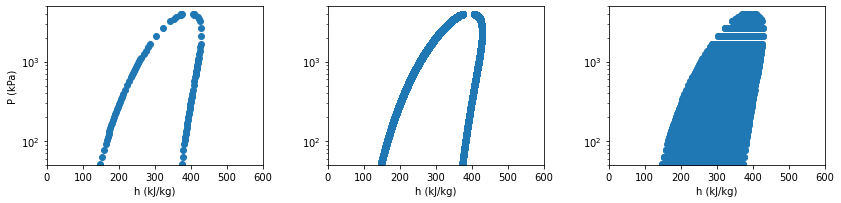

In [18]:
fig=plt.figure();

for i in range(0,3):
  if i == 0: df=o_df
  elif i==1: df=df_part1
  elif i==2: df=generated_df
  ax=fig.add_axes([(i*.65),0,.5,.55]);
  ax.set_yscale('log');
  plt.ylim([50, 5000]);
  plt.xlim([0, 600]);
  if i !=2 :
    ax.scatter(x=df['hf (kJ/kg)'].values,y=df['P (kPa)'].values,c='#1f77b4',marker='o');
    ax.scatter(x=df['hg (kJ/kg)'].values,y=df['P (kPa)'].values,c='#1f77b4',marker='o');
  else:ax.scatter(x=df['h (kJ/kg)'].values,y=df['P (kPa)'].values,c='#1f77b4',marker='o');
  if i==0: ax.set_ylabel('P (kPa)',fontsize=10);
  ax.set_xlabel('h (kJ/kg)',fontsize=10);

#Training the models with various Ks

In [19]:
saturation_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_0.5_for_P_1_for_h.csv')
 
saturation_df

,T ©,P (kPa),X,v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-40.003000,51.200000,0.000000,0.000705,148.100000,148.140000,0.795590,807.220000,0.000467,0.110590
1,-40.003000,51.200000,0.004464,0.002314,149.025937,149.148304,0.799915,804.257545,0.000465,0.110133
2,-40.003000,51.200000,0.008929,0.003924,149.951875,150.156607,0.804239,801.295089,0.000463,0.109676
3,-40.003000,51.200000,0.013393,0.005533,150.877813,151.164911,0.808564,798.332634,0.000461,0.109218
4,-40.003000,51.200000,0.017857,0.007142,151.803750,152.173214,0.812888,795.370179,0.000459,0.108761
...,...,...,...,...,...,...,...,...,...,...
988318,100.333727,3999.490909,0.892857,0.002459,392.384422,402.219416,1.596131,93.623532,0.000028,0.065554
988319,100.333727,3999.490909,0.928571,0.002494,393.311312,403.287065,1.598993,93.458191,0.000028,0.065665
988320,100.333727,3999.490909,0.964286,0.002530,394.238201,404.354714,1.601855,93.292850,0.000027,0.065776
988321,100.333727,3999.490909,1.000000,0.002565,395.165091,405.422364,1.604716,93.127509,0.000026,0.065888


In [20]:
saturation_validation_df=pd.read_csv('/content/drive/MyDrive/ScientificProjects/PureSubstances/NIST_R134a_saturated_augmented_0.2_for_P_1_for_h.csv')
 
saturation_validation_df

,T ©,P (kPa),X,v (m^3/kg),u (kJ/kg),h (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
0,-40.003000,51.200000,0.000000,0.000705,148.100000,148.140000,0.795590,807.220000,0.000467,0.110590
1,-40.003000,51.200000,0.004464,0.002314,149.025937,149.148304,0.799915,804.257545,0.000465,0.110133
2,-40.003000,51.200000,0.008929,0.003924,149.951875,150.156607,0.804239,801.295089,0.000463,0.109676
3,-40.003000,51.200000,0.013393,0.005533,150.877813,151.164911,0.808564,798.332634,0.000461,0.109218
4,-40.003000,51.200000,0.017857,0.007142,151.803750,152.173214,0.812888,795.370179,0.000459,0.108761
...,...,...,...,...,...,...,...,...,...,...
2486911,100.337518,3999.798561,0.892857,0.002458,392.367937,402.199265,1.596076,93.611275,0.000028,0.065629
2486912,100.337518,3999.798561,0.928571,0.002493,393.293253,403.265098,1.598933,93.446896,0.000028,0.065741
2486913,100.337518,3999.798561,0.964286,0.002528,394.218569,404.330930,1.601789,93.282516,0.000027,0.065853
2486914,100.337518,3999.798561,1.000000,0.002563,395.143885,405.396763,1.604646,93.118137,0.000026,0.065966


In [21]:
saturation_X_train=saturation_X_test=saturation_df[['T ©',  'h (kJ/kg)']]
saturation_y_train=saturation_y_test=saturation_df[['X','P (kPa)', 'v (m^3/kg)', 'u (kJ/kg)' ,'s (kJ/kg.K)', 'Sound Spd. (m/s)','Viscosity (Pa.s)', 'Therm. Cond. (W/m.K)']]

In [22]:
saturation_validation_X=saturation_validation_df[['T ©', 'h (kJ/kg)']]
saturation_validation_y=saturation_validation_df[['X','P (kPa)', 'v (m^3/kg)', 'u (kJ/kg)' ,'s (kJ/kg.K)', 'Sound Spd. (m/s)','Viscosity (Pa.s)', 'Therm. Cond. (W/m.K)']]

a, saturation_valid_X, c, saturation_valid_y = train_test_split(saturation_validation_X,
                                          saturation_validation_y,
                                          test_size=.005,
                                          random_state=40,
                                          shuffle=True)


print(len(saturation_valid_y))
indeces=saturation_valid_y[(saturation_valid_y['X']<0.01)].index
saturation_valid_y.drop(index=indeces,inplace=True)
saturation_valid_X.drop(index=indeces,inplace=True)
len(saturation_valid_y)

12435


12263

In [23]:
for K in range(1,6):

  saturation_model=KNR(n_neighbors=K,weights='distance',p=1)
  saturation_model.fit(saturation_X_train, saturation_y_train)
  print("For K = {}, The maximum percent error is {} %.".format(K,(np.abs((saturation_model.predict(saturation_X_test)-saturation_y_test)/saturation_y_test).max().max())*100))

For K = 1, The maximum percent error is 0.0 %.
For K = 2, The maximum percent error is 0.0 %.
For K = 3, The maximum percent error is 0.0 %.
For K = 4, The maximum percent error is 0.0 %.
For K = 5, The maximum percent error is 0.0 %.


In [24]:
for K in range(1,11):

  saturation_model=KNR(n_neighbors=K,weights='distance',p=1)
  saturation_model.fit(saturation_X_train, saturation_y_train)
  print("For K = {}, The maximum percent error is {} %.".format(K,(np.abs((saturation_model.predict(saturation_valid_X)-saturation_valid_y)/saturation_valid_y).max().max())*100))

For K = 1, The maximum percent error is 0.492610837438373 %.
For K = 2, The maximum percent error is 0.5749684090619495 %.
For K = 3, The maximum percent error is 0.9636949443355058 %.
For K = 4, The maximum percent error is 1.7461891792967217 %.
For K = 5, The maximum percent error is 1.5816777187025628 %.
For K = 6, The maximum percent error is 2.3839056867011674 %.
For K = 7, The maximum percent error is 2.077062904670748 %.
For K = 8, The maximum percent error is 3.424712604181827 %.
For K = 9, The maximum percent error is 3.2770404473097416 %.
For K = 10, The maximum percent error is 3.056982111702768 %.


#Analyzing the best model

In [25]:
K=3
saturation_model=KNR(n_neighbors=K,weights='distance',p=1)
saturation_model.fit(saturation_X_train, saturation_y_train)
print("For K = {}, The validation maximum percent error is {} %.".format(K,(np.abs((saturation_model.predict(saturation_valid_X)-saturation_valid_y)/saturation_valid_y).max().max())*100))
print("For K = {}, The validation minimum percent error is {} %.".format(K,(np.abs((saturation_model.predict(saturation_valid_X)-saturation_valid_y)/saturation_valid_y).min().min())*100))
start=time.time()
saturation_model.predict(saturation_valid_X)
print("The elapsed time for predicting {} entry is {} seconds.".format(len(saturation_valid_X),(time.time()-start)))

For K = 3, The validation maximum percent error is 0.9636949443355058 %.
For K = 3, The validation minimum percent error is 0.0 %.
The elapsed time for predicting 12263 entry is 0.10676264762878418 seconds.


In [26]:
saturation_error_df= ((saturation_model.predict(saturation_valid_X)-saturation_valid_y)/saturation_valid_y)*100
saturation_error_df.describe()

,X,P (kPa),v (m^3/kg),u (kJ/kg),s (kJ/kg.K),Sound Spd. (m/s),Viscosity (Pa.s),Therm. Cond. (W/m.K)
count,1.226300e+04,12263.000000,12263.000000,1.226300e+04,12263.000000,12263.000000,12263.000000,12263.000000
mean,1.648636e-04,0.000128,-0.000064,-1.075489e-05,-0.000015,0.000077,0.000095,0.000049
std,1.234340e-02,0.028435,0.027995,2.878937e-03,0.001908,0.005438,0.010511,0.006269
min,-4.181606e-01,-0.529871,-0.472918,-6.161017e-02,-0.041369,-0.092136,-0.191481,-0.185653
25%,-2.727075e-14,-0.004819,-0.005206,-6.030671e-04,-0.000271,-0.002517,-0.002589,-0.000956
50%,0.000000e+00,-0.000016,0.000024,-3.140426e-07,-0.000001,0.000019,0.000041,0.000000
75%,2.756375e-14,0.004840,0.005146,5.885564e-04,0.000264,0.002554,0.002644,0.000970
max,9.636949e-01,0.369440,0.513378,6.312527e-02,0.044760,0.102888,0.206202,0.150489


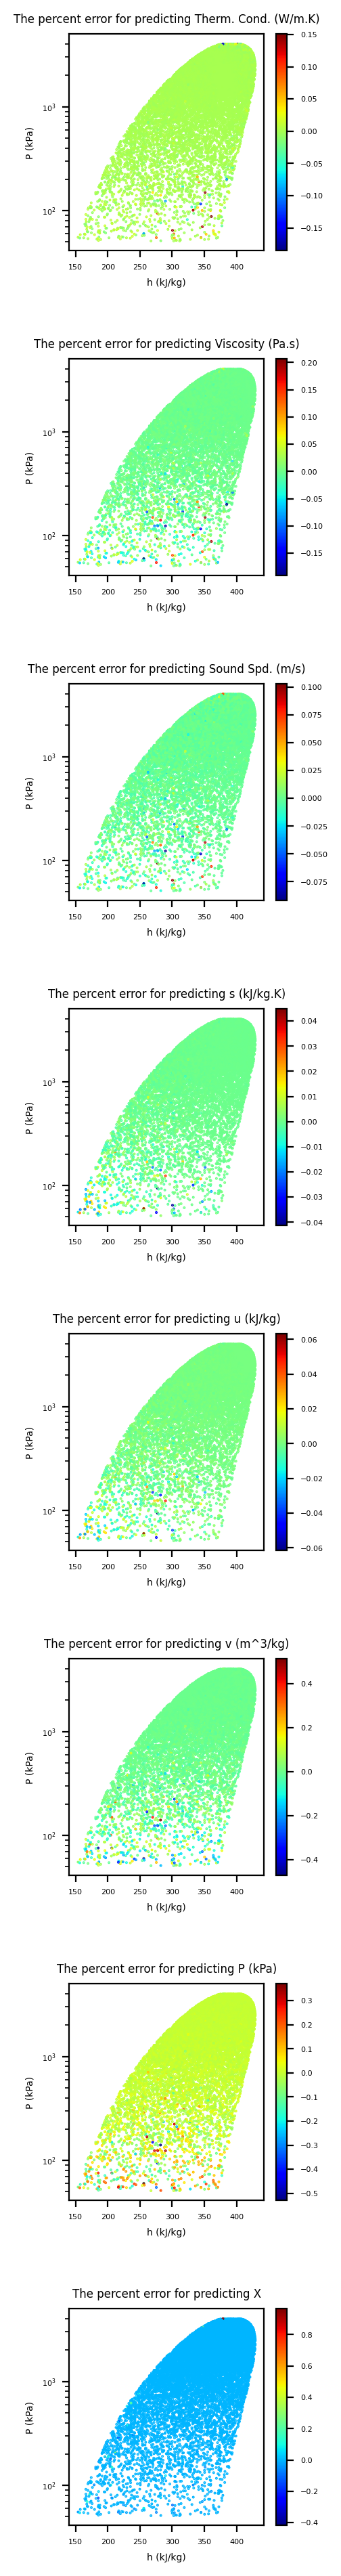

In [27]:
fig=plt.figure(dpi=200);


for i,col in enumerate(saturation_error_df.columns):

  plt.rc('xtick', labelsize=4);
  plt.rc('ytick', labelsize=4);
  ax=fig.add_axes([0,(i*.6),.3,.4]);
  x=ax.scatter(saturation_valid_X['h (kJ/kg)'], saturation_valid_y['P (kPa)'], c=saturation_error_df[col],cmap="jet", s=.2);
  ax.set_ylabel('P (kPa)',fontsize=5)
  ax.set_yscale('log');
  plt.colorbar(x);
  plt.title('The percent error for predicting {}'.format(col),fontsize=6);
  ax.set_xlabel('h (kJ/kg)',fontsize=5);


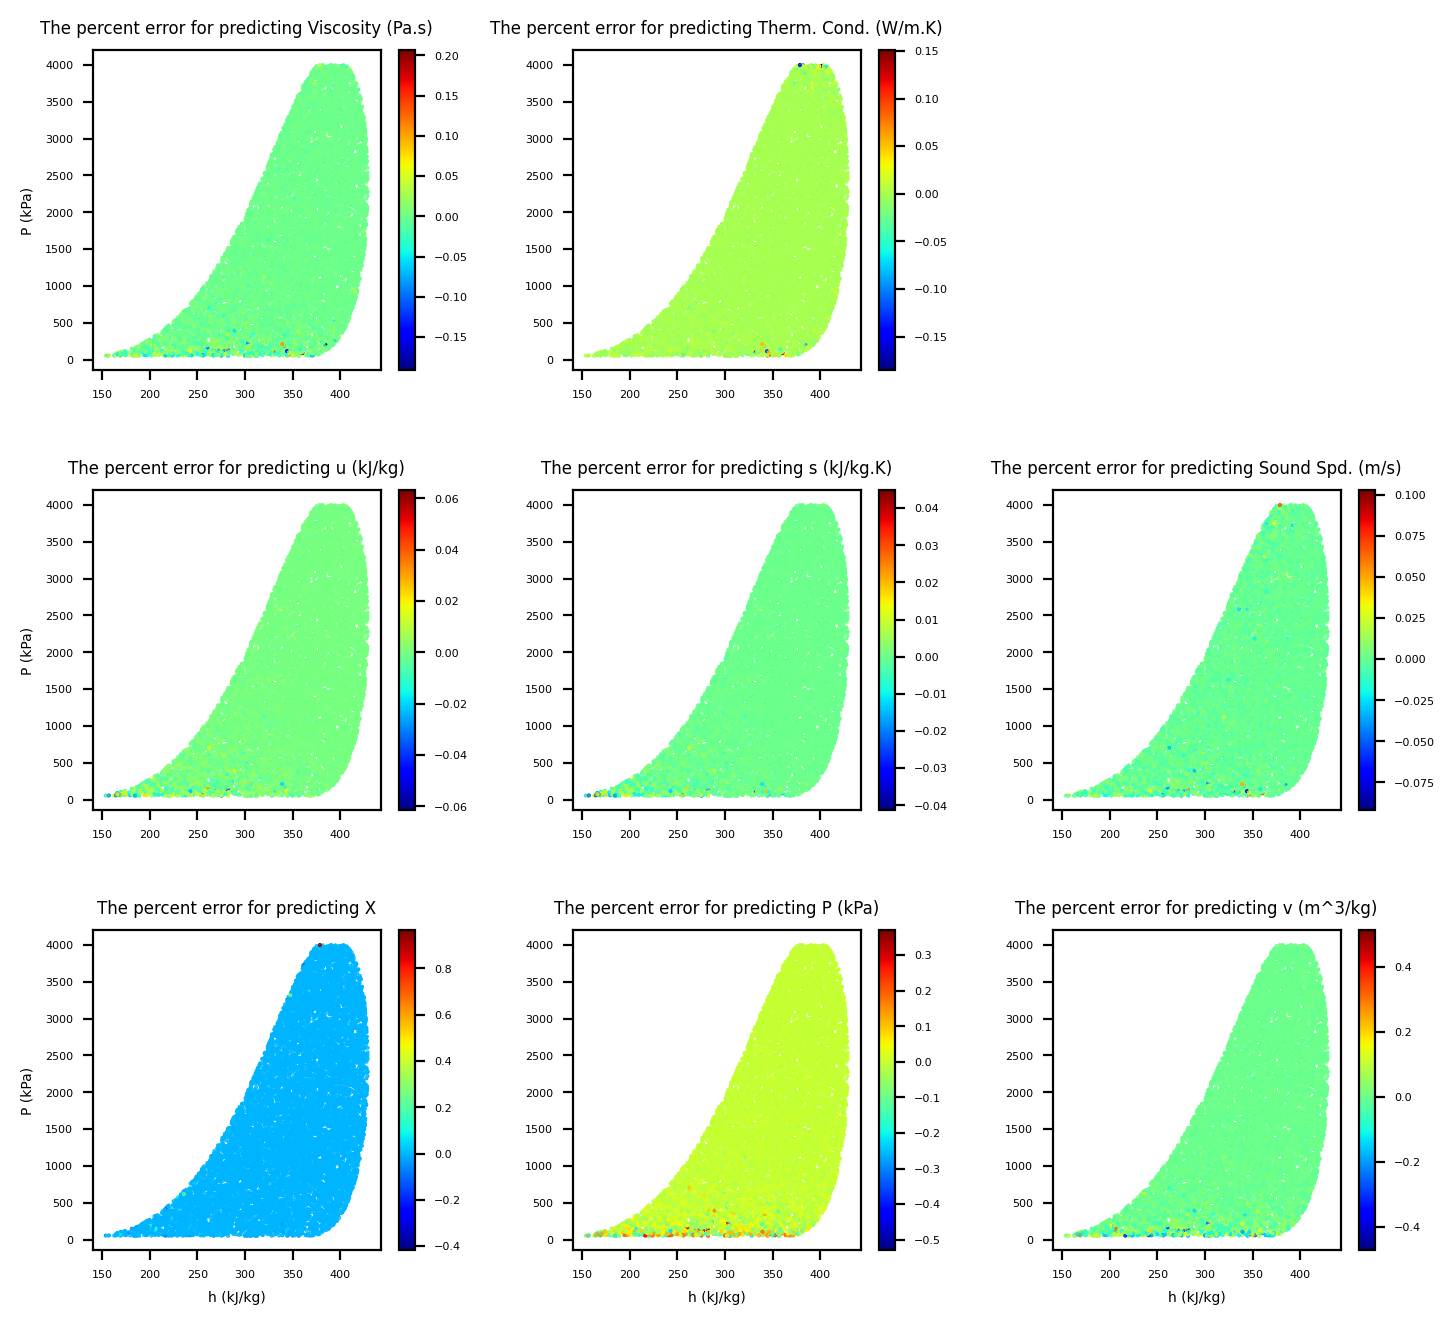

In [35]:
fig=plt.figure(dpi=200);


for i in range(0,3):
  for k in range(0,3):
    if (k+(i*3))>(len(saturation_error_df.columns)-1): break
    col=saturation_error_df.columns[(k+(i*3))]
    plt.rc('xtick', labelsize=4);
    plt.rc('ytick', labelsize=4);
    ax=fig.add_axes([(k*.4),(i*.55),.3,.4]);
    x=ax.scatter(saturation_valid_X['h (kJ/kg)'], saturation_valid_y['P (kPa)'], c=saturation_error_df[col],cmap="jet", s=.2);
    if k ==0: ax.set_ylabel('P (kPa)',fontsize=5)
    plt.colorbar(x);
    plt.title('The percent error for predicting {}'.format(col),fontsize=6);
    if i==0: ax.set_xlabel('h (kJ/kg)',fontsize=5);
  if ((i+k+1)>len(saturation_error_df.columns)):break

In [29]:
for i,col in enumerate(saturation_valid_y.columns):
  mse(saturation_model.predict(saturation_valid_X)[:,i],saturation_valid_y[col])
  print('The MSE for the columns {} is {}'.format(col,mse(saturation_model.predict(saturation_valid_X)[:,i],saturation_valid_y[col])))

The MSE for the columns X is 3.7656574865738336e-10
The MSE for the columns P (kPa) is 0.009558519363340097
The MSE for the columns v (m^3/kg) is 9.791845242980125e-10
The MSE for the columns u (kJ/kg) is 5.203425999765873e-05
The MSE for the columns s (kJ/kg.K) is 5.267302650849499e-10
The MSE for the columns Sound Spd. (m/s) is 0.0004207779018714065
The MSE for the columns Viscosity (Pa.s) is 3.9679193970475266e-16
The MSE for the columns Therm. Cond. (W/m.K) is 9.05361540962482e-12
